# Load dataset Daily CHIRPS

## Load files

In [49]:
import os
path = 'C:/Users/manue/OneDrive/Documentos/phd/data/chirps/'
files = os.listdir(path)

## Establish the geographic points of Boyacá

In [88]:
import numpy as np
x = np.arange(-74.8, -71.9, 0.05)
y = np.arange(4.5, 7.3, 0.05)
xx, yy = np.meshgrid(x, y)
xnorm = (xx - xx.min()) / (xx.max() - xx.min())
ynorm = (yy - yy.min()) / (yy.max() - yy.min())

## Create dataset CHIRPS precipitation data

In [130]:
import netCDF4 as nc
import xarray as xr
import pandas as pd
for file in files:
        ds_chirps_nc = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+file)))
        # delimit the boundaries of Boyacá
        ds_boyaca = ds_chirps_nc.sel(longitude=slice(-74.8,-71.9), latitude=slice(4.5,7.3))
        df_all = pd.concat([df_all,ds_boyaca.to_dataframe().reset_index()])

In [132]:
df_all

,latitude,longitude,time,precip
0,4.524998,-74.775002,2022-01-01,15.852234
1,4.524998,-74.775002,2022-01-02,0.000000
2,4.524998,-74.775002,2022-01-03,0.000000
3,4.524998,-74.775002,2022-01-04,0.000000
4,4.524998,-74.775002,2022-01-05,0.000000
...,...,...,...,...
1185515,7.274998,-71.925003,2022-12-27,0.000000
1185516,7.274998,-71.925003,2022-12-28,0.000000
1185517,7.274998,-71.925003,2022-12-29,0.000000
1185518,7.274998,-71.925003,2022-12-30,5.989796


In [139]:
for file in files:
    print(file)

chirps-v2.0.2005.days_p05.nc
chirps-v2.0.2006.days_p05.nc
chirps-v2.0.2007.days_p05.nc
chirps-v2.0.2008.days_p05.nc
chirps-v2.0.2009.days_p05.nc
chirps-v2.0.2010.days_p05.nc
chirps-v2.0.2011.days_p05.nc
chirps-v2.0.2012.days_p05.nc
chirps-v2.0.2013.days_p05.nc
chirps-v2.0.2014.days_p05.nc
chirps-v2.0.2015.days_p05.nc
chirps-v2.0.2016.days_p05.nc
chirps-v2.0.2017.days_p05.nc
chirps-v2.0.2018.days_p05.nc
chirps-v2.0.2019.days_p05.nc
chirps-v2.0.2020.days_p05.nc
chirps-v2.0.2021.days_p05.nc
chirps-v2.0.2022.days_p05.nc


In [169]:
ds_chirps_nc_2005 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2005.days_p05.nc')))
ds_chirps_nc_2006 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2006.days_p05.nc')))
ds_chirps_nc_2007 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2007.days_p05.nc')))

# delimit the boundaries of Boyacá
ds_chirps_nc_2005 = ds_chirps_nc_2005.sel(longitude=slice(-74.8,-71.9), latitude=slice(4.5,7.3))
ds_chirps_nc_2006 = ds_chirps_nc_2006.sel(longitude=slice(-74.8,-71.9), latitude=slice(4.5,7.3))
ds_chirps_nc_2007 = ds_chirps_nc_2007.sel(longitude=slice(-74.8,-71.9), latitude=slice(4.5,7.3))

In [170]:
ds2005_2007 = xr.concat([ds_chirps_nc_2005,ds_chirps_nc_2006,ds_chirps_nc_2007], dim='time')

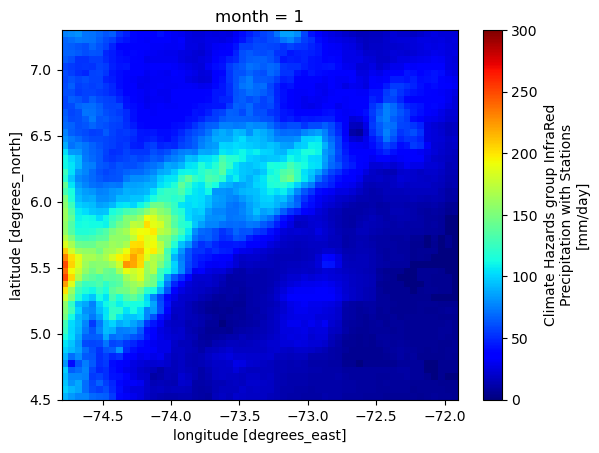

In [171]:
ds_chirps_nc_2007_mon = ds_chirps_nc_2007.groupby('time.month').sum()
ds_chirps_nc_2007_mon.precip[0,:,:].plot(cmap='jet', vmax=300)

In [172]:
import calendar # We'll use this library to easily add month name to subplot titles.

In [173]:
# First, We will develop a land mask data array that we can use to mask out the nan values:
landmask = ds_chirps_nc_2007.precip.sum(dim='time')>0

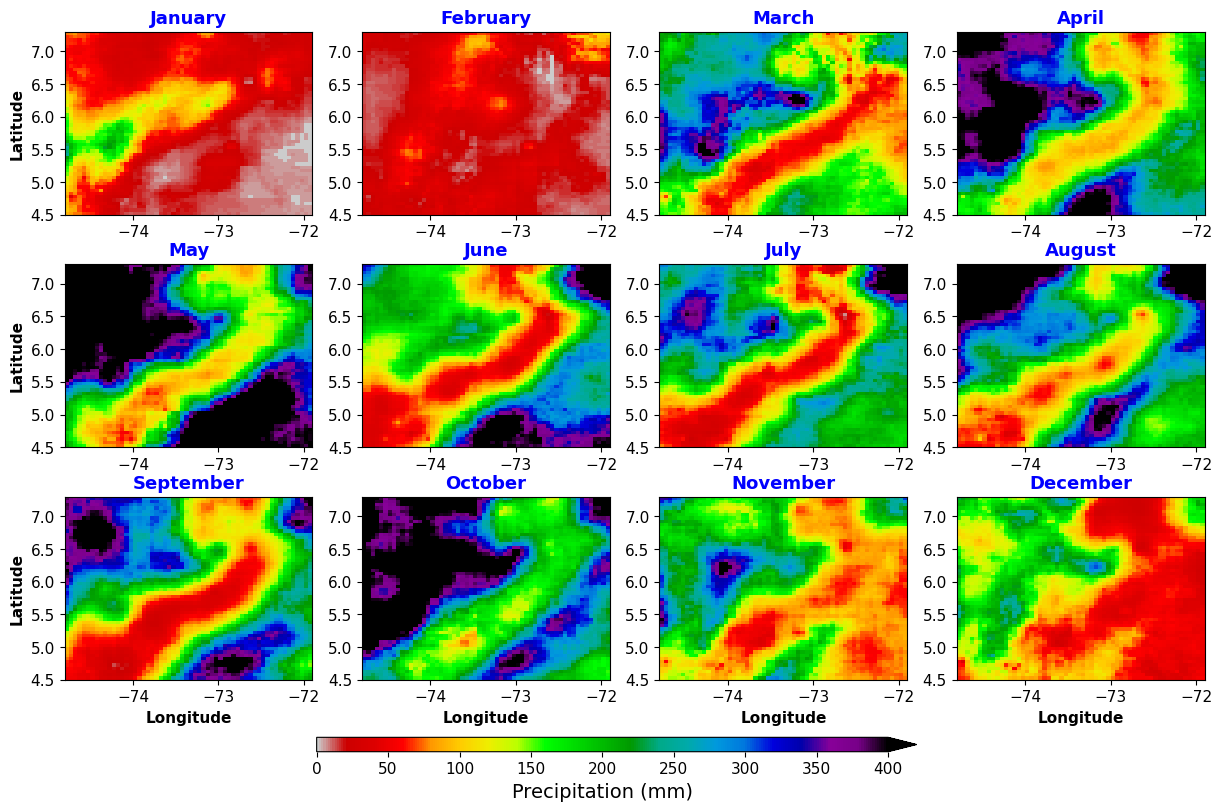

In [174]:
fig = plt.figure(figsize=[12,8], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.96, left=0.04, right=0.99, 
                    wspace=0.2, hspace=0.27) # wspace and hspace adjust the horizontal and vertical spaces, respectively.
nrows = 3
ncols = 4
for i in range(1, 13):
    plt.subplot(nrows, ncols, i)
    dataplot = ds_chirps_nc_2007_mon.precip[i-1, :, :].where(landmask) # Remember that in Python, the data index starts at 0, but the subplot index start at 1.
    p = plt.pcolormesh(ds_chirps_nc_2007_mon.longitude, ds_chirps_nc_2007_mon.latitude, dataplot,
                   vmax = 400, vmin = 0, cmap = 'nipy_spectral_r',
                   ) 
    plt.xlim([-74.8, -71.9])
    plt.ylim([4.5, 7.3])
    plt.title(calendar.month_name[dataplot.month.values], fontsize = 13, 
              fontweight = 'bold', color = 'b')
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    if i % ncols == 1: # Add ylabel for the very left subplots
        plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
    if i > ncols*(nrows-1): # Add xlabel for the bottom row subplots
        plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')

# Add a colorbar at the bottom:
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Precipitation (mm)', color = 'k', size=14)

# Now we can save a high resolution (300dpi) version of the figure:
plt.savefig('Fig_prec_cpc_mon_2012.png', format = 'png', dpi = 300)

In [176]:
# convert xarray to geopandas
gdf_precip = gpd.GeoDataFrame(df_all.precip, geometry=gpd.points_from_xy(df_all.longitude,df_all.latitude))
gdf_boyaca = gpd.read_file('anaconda3/envs/rainfall/github.com/nowthings/analysis_climatic_variables/2_analysis_chirps/boyaca.shp')#, crs="epsg:4326")

ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing fiona resulted in: DLL load failed while importing _env: No se encontró el proceso especificado.
Importing pyogrio resulted in: No module named 'pyogrio'